<a href="https://colab.research.google.com/github/usausagichan/AB-test-referral-program/blob/main/user_referral_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Test Practice: User Referral Program
As I'm currently studying about A/B test, I would like to put it into practice inorder to better understand it and know how to implement it. I chose an excercise about referral program from data masked.com(https://datamasked.com/)[1]

The main task in this excercise is to perform A/B test in order to know if the referral program works(or help company to make more money) or not.

I assume the success of referral program is defined as
<br>(1) find valuable users(the referral users spent more than normal users)
<br>(2) boost the sales, or more money was spent overall.

To know whether the referral program works, we should know:
<br>(1) Is users from referral program spent more than normal users?
<br>(2) Does referral program makes the money grows up?

Let's start up from the first question.



In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

First import the data.(The excel file is from https://datamasked.com/. I afraid I can't provide you the dataset here because of copy right issue) 

In [ ]:
drive.mount('/content/gdrive') 
data=pd.read_csv("/content/gdrive/My Drive/excel/referral.csv",parse_dates=['date'],dtype={'user_id':str})
data

Mounted at /content/gdrive


,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH
...,...,...,...,...,...,...
97336,19934,2015-11-27,UK,35,1,AWMDRMOFTSZIH
97337,19941,2015-11-27,DE,31,1,QAUSDXXLVUERE
97338,19948,2015-11-27,UK,22,1,DCYLHYFLMRODO
97339,19953,2015-11-27,UK,35,1,LROILUYWCNVWQ


Note that the user_id is not unique value. Same users can perform transactions multiple time.<br>
Use data.info to check whether the Data type in every column is appropriate.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      97341 non-null  object        
 1   date         97341 non-null  datetime64[ns]
 2   country      97341 non-null  object        
 3   money_spent  97341 non-null  int64         
 4   is_referral  97341 non-null  int64         
 5   device_id    97341 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.5+ MB


## Task(1) Is users from referral program spent more than normal users?


Our challenge is to see if the users obtained from referral channel (labeled by 1 in 'is_referral feature')really spent much more money than common users(labeled by 1 in 'is_referral feature'). The users imformation include device_id, user_id, country, date, is_referral and money they spent. 

Now let's define A group and B group. I define A group(test group) as users from referral channel where as B group are not. (control group). 

In [ ]:
test=data[data['is_referral']==1]
control=data[data['is_referral']==0]

In [ ]:
print('----test_data-----')
print(test.describe(include='all'))
print('----control_data----')
print(control.describe(include='all'))

----test_data-----
       user_id                 date country   money_spent  is_referral  \
count    28017                28017   28017  28017.000000      28017.0   
unique   12715                   28       9           NaN          NaN   
top       9803  2015-11-14 00:00:00      FR           NaN          NaN   
freq        10                 1855    4748           NaN          NaN   
first      NaN  2015-10-31 00:00:00     NaN           NaN          NaN   
last       NaN  2015-11-27 00:00:00     NaN           NaN          NaN   
mean       NaN                  NaN     NaN     46.963879          1.0   
std        NaN                  NaN     NaN     24.396786          0.0   
min        NaN                  NaN     NaN     10.000000          1.0   
25%        NaN                  NaN     NaN     28.000000          1.0   
50%        NaN                  NaN     NaN     44.000000          1.0   
75%        NaN                  NaN     NaN     62.000000          1.0   
max        NaN     

<ipython-input-5-71a59a7b1107>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(test.describe(include='all'))
<ipython-input-5-71a59a7b1107>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(control.describe(include='all'))


Looking carefully to the start date in both test group and control group, we can see they are different. The start date of control group is much more earlier than test group. (**test group:2015-10-31, control group: 2015-10-03)** So the referral program may start up at 10/31.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


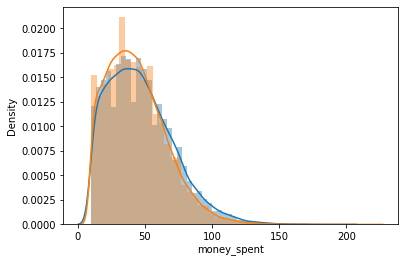

In [ ]:
sns.distplot(test['money_spent'])
sns.distplot(control['money_spent'])

Let's plot the distribution of test and control group, and we can see that they looks quite different. Maybe it's because the control group include data before 2015-10-31, but test group does not. So let's extract the data after 2015-10-31 from control group and compare it to test group.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ntest:	 28017 Ncontrol:	 21983


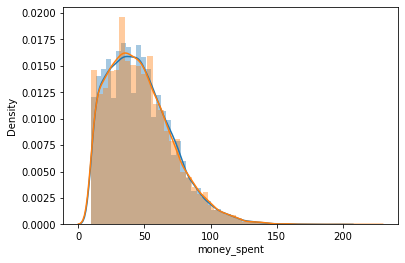

In [ ]:
start_date=pd.to_datetime('2015-10-31')
control_=control[control['date']>=start_date]
sns.distplot(test['money_spent'])
sns.distplot(control_['money_spent'])
print('Ntest:\t',test['money_spent'].shape[0],'Ncontrol:\t',control_['money_spent'].shape[0])

The distribution looks much more closer! Though the bar plot don't perfectly match, the fitting lines are almost coincide. To analyze them in more restricted way, let's perform hypothesis test.

Since the sample size is large(Ntest= 28017, Ncontrol=21983),
and we can approximate the distribution of mean value as standard normal if the sample size is greater than 30 according to rule of thumb. Therefore, we can use z-test to justify if the test and control sample come from the same distribution or not. 
We can assume H0(null hypothesis) is that the money_spent in test group are not greater than the control group(test['money_spent']-control['money_spent']<=0). Then we use z-test to justify if H0 can be rejected or not to see if the money spent in test group(referral=1) improve. This is an one sided test, so we only need to calculate p_right.

In [ ]:
from scipy.stats import norm
n1=test.shape[0]
sig1=test['money_spent'].var(ddof=1)
n2=control_.shape[0]
sig2=control_['money_spent'].var(ddof=1)
sigma=np.sqrt(sig1/n1+sig2/n2)
t=(test['money_spent'].mean()-control_['money_spent'].mean())/(sigma)
p_right = 1 - norm.cdf(np.abs(t))
p_right

0.19323036202047217

The outcoming p_value is about 19%, therefore we can't reject H0, or we can't say the test group spent more money than the control group. We can also verify the p_value we calculated from the scipy package. Note that we should devide the outcome p_value by 2 since we are performing an one-sided test.

In [ ]:

t2, p_value2 = stats.ttest_ind(test['money_spent'], control_['money_spent'])
print("p2:\t", p_value2/2)


p2:	 0.19315977134394074


The result match the previous outcome. The p_value is 19% and larger than 5%. As the result, we can't reject H0. We have no reason to believe that users from referral channel spent more than those aren't. However, the distribution plots of test and control group show the difference, though it is small.

To find where's the difference, we can explore the data by splitting the dataset into differnt segment.

First let's focus on the date. I plot the proportion in each group(referral or not referral) to see if they distributed differntly based on the date or not.

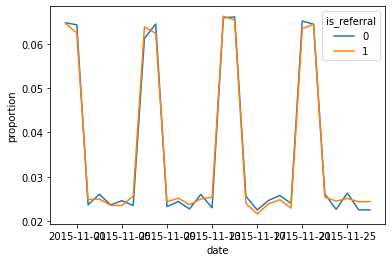

In [ ]:
df = pd.concat([control_[['date','is_referral']], test[['date','is_referral']]])
(df['date'].
 groupby(df['is_referral']).
 value_counts(normalize=True).
 rename('proportion').
 reset_index().
 pipe((sns.lineplot,'data'),x='date',y='proportion',hue='is_referral'))

It seems that the test and control group have same disribution based on the date. This pattern may come from the higher traffic on every weekend. Both of them varies periodically and the line almost conincide. This tell us that the date may not be a good information to help us distinguish between test and control group, which implies that the date shows no impact on the referral program.

How about country?
Let's see how test group and control group disributed in different country.

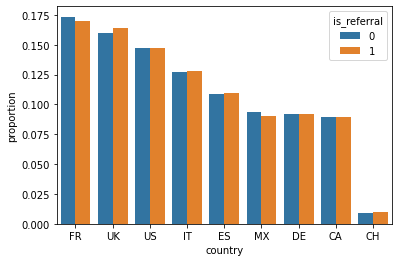

In [ ]:
df = pd.concat([control_[['country','is_referral']], test[['country','is_referral']]])
(df['country'].
 groupby(df['is_referral']).
 value_counts(normalize=True).
 rename('proportion').
 reset_index().
 pipe((sns.barplot,'data'),x='country',y='proportion',hue='is_referral'))

Ideally, if the sample of test and control group distribute equivalently, the bars should be equal in height.
However we can only see that in US, AS,DE. We can see slightly difference in test and control group in other countries. Especially in UK, FR and MX. This implies that for the user obtained by referral program, they are more likely from UK, and less likely from MX and FR. To see this numerically, I create a DataFrame to see the proportion of all users, users in test group and users in control group in each country. The diff(%) column refers the different of proportion of test group and control group divided by the proportion of total users in each country.



In [ ]:
result=data[data['date']>=start_date]
users = result.groupby('country')['user_id'].agg([
                                ('Count_proportion', 'count'),                 
                                ("user_test_proportion", lambda x: x[result["is_referral"]==1].count()),
                                ("user_control_proportion", lambda x: x[result["is_referral"]==0].count())
                                ],axis=1)
users['user_test_proportion']/=users['user_test_proportion'].sum()
users['user_control_proportion']/=users['user_control_proportion'].sum()
users['Count_proportion']/=users['Count_proportion'].sum()
users['diff(%)']=abs(users['user_test_proportion']-users['user_control_proportion'])*100/users['Count_proportion']
users

,Count_proportion,user_test_proportion,user_control_proportion,diff(%)
country,,,,
CA,0.08960,0.089446,0.089797,0.391705
CH,0.00956,0.009958,0.009052,9.474791
DE,0.09186,0.092016,0.091662,0.385177
ES,0.10892,0.109291,0.108447,0.774285
FR,0.17120,0.169469,0.173407,2.300343
IT,0.12764,0.127851,0.127371,0.375899
MX,0.09184,0.090624,0.093390,3.012628
UK,0.16186,0.163758,0.159441,2.666707
US,0.14752,0.147589,0.147432,0.106329


From the table we can see that in CH, FR, MX and UK, the difference of proportion is relatively high(>1%). The demographic in test and control group are not totally same. So if we want to discuss the question about "Whether users from referral program spent more money or not", the sampling still have room for improvement.
 

In [ ]:
pdata=data[data['date']>=start_date]
pvalue = pdata.groupby('country')['money_spent'].agg([
                                ('test_money_spent',lambda x:x[pdata['is_referral']==1].mean()),
                                ('control_money_spent',lambda x:x[pdata['is_referral']==0].mean()),
                                ("p_value", lambda x: stats.ttest_ind(x[pdata["is_referral"]==1], 
                                                                    x[pdata["is_referral"]==0], 
                                                                    equal_var=False
                                                                    ).pvalue/2),
                                ],axis=1)
pvalue

,test_money_spent,control_money_spent,p_value
country,,,
CA,48.820032,49.801925,0.115387
CH,59.544803,60.582915,0.360660
DE,49.072149,48.577171,0.270822
ES,44.634879,44.389262,0.327048
FR,44.608045,44.591028,0.484481
IT,44.511167,44.991786,0.174027
MX,42.939346,42.818802,0.430619
UK,49.630776,48.443367,0.025613
US,49.742201,49.517124,0.363031


Only UK has the p_value smaller than 5%, so I assume the test group spent more than control only in UK. The difference of mean money spent between the two group is about 1.2. 

## Task(2) Does referral program makes the users spent more?

To answer this question, we can divide the data into test and control group and perform A/B Test. From prevous section we know that the referral program start up at 10/31, so we can define the control group as data before 10/31, whereas test group as data after 10/31.

In [ ]:
start_date=pd.to_datetime('2015-10-31')
data['test']=1
data['test']=data['test'].where(data['date']>=start_date,0)
data

,user_id,date,country,money_spent,is_referral,device_id,test
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,0
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,0
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,0
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,0
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,0
...,...,...,...,...,...,...,...
97336,19934,2015-11-27,UK,35,1,AWMDRMOFTSZIH,1
97337,19941,2015-11-27,DE,31,1,QAUSDXXLVUERE,1
97338,19948,2015-11-27,UK,22,1,DCYLHYFLMRODO,1
97339,19953,2015-11-27,UK,35,1,LROILUYWCNVWQ,1


Usually the sales will boost on weekend without any external factor. Let's plot and see.

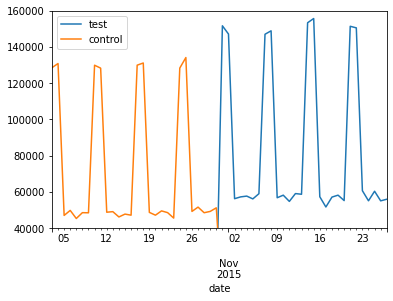

In [ ]:
exp=data.groupby('date')['money_spent'].agg([('test',lambda x: x[data['test']==1].sum()),
                                             ('control', lambda x: x[data['test']==0].sum())
                                             ],axis=1)

exp.plot(ylim=(40000,160000))

Both test and control groups are periodic, and the pattern may comes from weekend days. <br>Also, the sale price does grow after October 31st. Let's perform z-test to see if we can reject the null hypothesis(money spent in test group=in control group)

In [ ]:
test=data[data['test']==1]
control=data[data['test']==0]
t2, p_value2 = stats.ttest_ind(test['money_spent'], control['money_spent'])
print("p2:\t", p_value2/2)

p2:	 2.651757092919071e-209


The p_value is smaller than 5%. We do have reason to believe that the users spent more money during referral program period. 

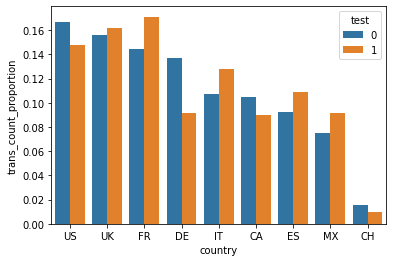

In [ ]:
(data['country'].
 groupby(data['test']).
 value_counts(normalize=True).
 rename('trans_count_proportion').
 reset_index().
 pipe((sns.barplot,'data'),x='country',y='trans_count_proportion',hue='test'))

However if we analyze the demographic of sample, we can find the distributions in test group and control group are different. So we should perform the A/B test based on different country.

In [ ]:

pvalue = data.groupby('country')['money_spent'].agg([
                                ('test_money_spent',lambda x:x[data['test']==1].mean()),
                                ('control_money_spent',lambda x:x[data['test']==0].mean()),
                                ("p_value", lambda x: stats.ttest_ind(x[data["test"]==1], 
                                                                    x[data["test"]==0], 
                                                                    equal_var=False
                                                                    ).pvalue/2),
                                ],axis=1)
pvalue

,test_money_spent,control_money_spent,p_value
country,,,
CA,49.252679,42.160484,2.264160e-43
CH,59.976987,57.279627,6.377139e-02
DE,48.854997,42.459846,3.231103e-39
ES,44.527360,42.454276,2.391054e-08
FR,44.600467,42.537595,7.389947e-12
IT,44.722031,42.307267,6.287989e-12
MX,42.885453,39.342841,2.128778e-13
UK,49.116520,42.429595,9.524136e-65
US,49.643303,42.230390,3.601599e-75


The p_values are all smaller than 5% except CH,which is about 6.4%. So we can believe that the referral program does work globally. And in general, the money spent in test group are greater than control group. Especially in country such as CA, US, UK, the referral program boost the money spent per transaction from 42.1 to 49.3 - about 17% growth! However in other region such as ES,FR,IT..., the growth is much samller than above countries.

## Conclusion

To see if the program succeed or not, we discuss two question:
<br>(1) Is users from referral program spent more than normal users?
<br>(2) Does referral program boost the sale?
<br> To answer (1), I split the data after October 31st(when the referral program start) into 
test group: users from referral and control group: normal users and perfrom z-test for testing hypothesis that all users spent money equally since the sample size is large enough. The outcome p-value tells us that we have no reason to believe that the users from referral program spent more. 
Looking deeper to the demographic of samples, we found that there's slightly difference in sample in the test group and control group. I then perform z-test based on different country. However the outcome still cannot tells us the difference between the money spent from normal users and referral program users except UK, where the referral users spent only about 2% greater than normal users. 
<br> In short, whether the referral program make the users spent more is not clear and seems not.

To answer (2), I split the data into
test group: data after 10/31 and control group: data before 10/31 then perfrom A/B test to see if the sales test group were boosted. Not only does the graph but also the z-test result tell us that the sales were boosted. However if we look into the sample's demographic, we can see that the distribution varies between test and control group. I then perform t-test seperately, and see that still the sales in almost every country have boosted during referral program period, especially US,UK,CA and DE.

## What we should do next?
The referral programs have boosted the sales where users spent more on average during program period. And the effect is significant especially in region such as US,UK, CA and DE. We should hold more saling program like that in these region, or we should check if some of the part in the program can do better in other country, such as the copywriting. 

However there is a flaw in AB test in second part. For the AB test discussing whether the sales boost, I compare the sales before and after the referral program start and get better user money spending in average in the referral group with statistically significant. But we should be careful before reaching the conclution that the referral program boost the sales, since the samples in test and control group are collected in different period and the sales boosting may be caused by season effect or some environmental factor. Thus, we should compare the sales with historical data to see if the sales would naturally perform greater in winter. Or, we can perform the test simultaneously by letting some of the users know the referral program and some do not. Then split the data based on whether the users know the referral program or not.